In [1]:
import pandas as pd
import numpy as np
import scipy
import statistics as st
from statistics import mean
from statistics import median
from statistics import variance
from scipy import stats
from scipy.stats import mstats
import math
import statsmodels.api as sm 
from statsmodels.formula.api import ols

# Q1

In [2]:
######################### 
data = pd.read_csv (r"C:\Data\batfail.txt", sep = " ")
print(data)

    time  group
0    8.0      1
1    8.1      1
2    9.2      1
3    9.4      1
4   11.7      1
5    7.6      2
6    8.2      2
7    9.8      2
8   10.9      2
9   12.3      2
10   6.0      3
11   6.3      3
12   7.1      3
13   7.7      3
14   8.9      3
15   5.1      4
16   5.6      4
17   5.9      4
18   6.7      4
19   7.8      4


In [3]:
####  KRUSKALL-WALLIS TEST
from scipy.stats import kruskal
kruskal = scipy.stats.kruskal(data.time[(data.group==1)],data.time[(data.group==2)],data.time[(data.group==3)],data.time[(data.group==4)])

print(kruskal)

KruskalResult(statistic=11.914285714285711, pvalue=0.0076826239726703865)


In [4]:
# BONFERRONI CORRECTION with 2 sample t-test for each pair
import statsmodels.stats.multicomp as mc


comparison = mc.MultiComparison(data.time, data.group)
result, tbl1, tbl2 = comparison.allpairtest(stats.ttest_ind, method= "bonf")
#using 2 sample t-test for each pair (which might NOT be eligible, since data are not normal)

print(result)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     1      2 -0.4404 0.6713       1.0  False
     1      3  2.4592 0.0394    0.2362  False
     1      4  3.7417 0.0057    0.0341   True
     2      3   2.544 0.0345     0.207  False
     2      4  3.6018  0.007    0.0418   True
     3      4  1.3952 0.2005       1.0  False
---------------------------------------------


In [5]:
# BONFERRONI TEST 
# using Man Whitney U test for each pair which might be better since samples are not normal
result, tbl1, tbl2 = comparison.allpairtest(stats.mannwhitneyu, method= "bonf")
print(result)

Test Multiple Comparison mannwhitneyu 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2 stat  pval  pval_corr reject
------------------------------------------
     1      2 10.0 0.3381       1.0  False
     1      3  2.0 0.0184    0.1101  False
     1      4  0.0 0.0061    0.0366   True
     2      3  3.0 0.0301    0.1803  False
     2      4  1.0 0.0108    0.0647  False
     3      4  6.0  0.105    0.6302  False
------------------------------------------


# Q2 LINEAR REGRESSION

In [2]:
#########################  Q2

data = pd.read_csv (r"C:\Data\crab.csv", sep = ",")
print(data)
#spine = 1 means both good; 2 means one worn or broken; 3 means both worn or broken

     Unnamed: 0  color  spine  width  satell  weight
0             1      3      3   28.3       8   3.050
1             2      4      3   22.5       0   1.550
2             3      2      1   26.0       9   2.300
3             4      4      3   24.8       0   2.100
4             5      4      3   26.0       4   2.600
..          ...    ...    ...    ...     ...     ...
168         169      4      3   26.1       3   2.750
169         170      4      3   29.0       4   3.275
170         171      2      1   28.0       0   2.625
171         172      5      3   27.0       0   2.625
172         173      3      2   24.5       0   2.000

[173 rows x 6 columns]


In [8]:
# CORREATION
quant = ['width',  'weight']
corr_matrix = data.loc[:,quant].corr()
print(corr_matrix)

           width    weight
width   1.000000  0.886871
weight  0.886871  1.000000


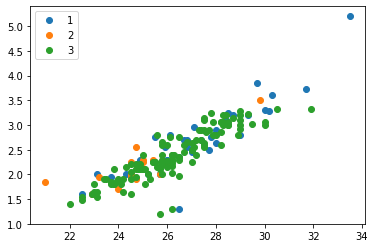

In [9]:
# Q2-a: scatter plot of weight and width classified by spine:
import matplotlib.pyplot as pyplot
groups = data.groupby("spine")
for name, group in groups:
    pyplot.plot(group["width"], group["weight"], marker="o", linestyle="", label=name)
    
pyplot.legend()
pyplot.show()

In [3]:
data.spine = data.spine.astype('category')
dummy = pd.get_dummies(data['spine']).values
print(dummy)
# first column dummy[:, 0] indicates spine = 1
# second column indicates spine = 2
# third column indicates spine = 3
# compare to the column "spine" under print(data) to know

[[0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [4]:
# Q2b: not using the columns of dummy, but define the indicator by ourselves
n = len(data.weight)
s1 = np.zeros(n)
s1[(data.spine == 1)] = 1 # indicator for spine = 1

s2 = np.zeros(n)
s2[(data.spine == 2)] = 1 # indicator for spine = 2
# spince = 3 is the reference

In [5]:
# Q2-b # Called MODEL-1
import statsmodels.api as sm 
n = len(data.weight)
weight = data.weight
inter = [1]*n 
#X = np.column_stack((inter, data.width, s1, s2))
X = np.column_stack((inter, data.width, dummy[:,0], dummy[:,1])) # same as using s1 and s2 created above
model = sm.OLS(weight, X )
results = model.fit()
print(results.summary())
#the output has x1 = width; x2 = I(spine = 1) and x3 = I(spine = 2).

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           2.43e-57
Time:                        21:23:40   Log-Likelihood:                -14.124
No. Observations:                 173   AIC:                             36.25
Df Residuals:                     169   BIC:                             48.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9992      0.264    -15.148      0.0

# Fitted model
$$ \hat{W} = -4 + 0.2438 x_1 + 0.0697x_2 + 0.1251x_3$$

x1 = width

x2 = dummy[:,0] = indicator for spine = 1

x3 = dummy[:,1] = indicator for spine = 2

In [7]:
# MODEL-2 IF YOU WANT TO GET THE SAME ANSWER AS IN R: USING SPINE=2 AND SPINE=3
n = len(data.weight)
weight = data.weight
inter = [1]*n 
X = np.column_stack((inter, data.width, dummy[:,1], dummy[:,2])) # USING THE 2ND AND 3RD COLUMN OF DUMMY (FOR SPINE = 2 AND 3)
model = sm.OLS(weight, X )
results = model.fit()
print(results.summary())
#the output has x1 = width; x2 = I(spine = 2) and x3 = I(spine =3).


                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           2.43e-57
Time:                        12:22:43   Log-Likelihood:                -14.124
No. Observations:                 173   AIC:                             36.25
Df Residuals:                     169   BIC:                             48.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9296      0.275    -14.286      0.0

In [ ]:
# RESULT OF COEFFICIENTS TABLE FROM R:
(Intercept) -3.92955    0.27506 -14.286   <2e-16 ***
width        0.24376    0.01002  24.335   <2e-16 ***
spine2       0.05544    0.08475   0.654    0.514    
spine3      -0.06969    0.05065  -1.376    0.171    

In [ ]:
# width: test statistic = 24.335, ~ t_DF, DF = 173 - 4 = 169. p-value < 0.0001

In [6]:
from statsmodels.formula.api import ols
mod1 = ols('weight ~ width + spine', data=data).fit()
anova1 = sm.stats.anova_lm(mod1, typ=1) # change typ = 1; 
# this is the same as the anova table of model weight ~ spine + width in R
# categorical variable(s) is/are always pushed to the first row(s)
print(anova1)

             df     sum_sq    mean_sq           F        PR(>F)
spine       2.0   3.554916   1.777458   25.188561  2.665377e-10
width       1.0  41.788210  41.788210  592.185517  4.089090e-57
Residual  169.0  11.925667   0.070566         NaN           NaN


In [7]:
anova2 = sm.stats.anova_lm(mod1, typ=2) # change typ = 2; 
# this is to test the significance of of a variable (which even might has >=2 coef) WITH the presence of ALL other variables
# categorical variable appears in the first row.
print(anova2)

             sum_sq     df           F        PR(>F)
spine      0.298873    2.0    2.117679  1.234920e-01
width     41.788210    1.0  592.185517  4.089090e-57
Residual  11.925667  169.0         NaN           NaN


In [ ]:
#Q2c: p-value for variable width = x1 in the output is <0.0001 (from MODEL-1 or from table anova2) hence it is significant.

In [ ]:
#Q2d: 95% CI for coefficient of width is given in the output of MODEl-1 above: (0.224, 0.264)

In [ ]:
#Q2e: from output of MODEL-1, R-square = 0.792

In [18]:
#Q2f: the Mean Square Residuals MS_res:
sigma_square = results.scale # this is used to estimate sigma^2.
print(sigma_square)
# Or it coud be derived by:
print(results.mse_resid) 

0.07056607821402083
0.07056607821402083


In [12]:
#Q2g standardized residuals:
analysis = results.get_influence() 
#the standardized residuals:
SR = analysis.resid_studentized_internal #this is the standardized residuals of the model above.


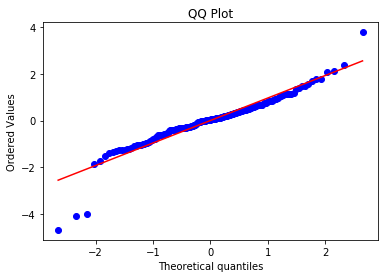

In [14]:
#Q2g: QQ plot
import matplotlib.pyplot as pyplot
scipy.stats.probplot(SR, dist="norm", plot=pyplot)
pyplot.title('QQ Plot') 
pyplot.show()

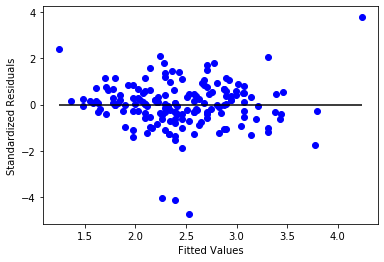

In [15]:
#Q2g:  SR vs fitted values:
fitted = results.fittedvalues

import matplotlib.pyplot as pyplot
pyplot.scatter(fitted, SR,color='b')  
pyplot.xlabel('Fitted Values') 
pyplot.ylabel('Standardized Residuals') 
pyplot.hlines(0, xmin = min(fitted), xmax = max(fitted) )
pyplot.title('') 
pyplot.show() 

In [ ]:
#Q2h Assumptions:
# Normaliy assumption: From the qq plot of SR, it has both right tail and left tail
# are heavier than normal, due to some outliers. Hence, normality assmption might be violated lightly.
# SR vs fitted: there are 4 outliers obviously with large |SR|.
# the residuals might have equal variance.

In [16]:
#Q2i: 
newpoint = [1,27,1,0]
y =  results.predict(newpoint) # predict out of sample
print(y)

[2.6520425]


In [17]:
#Q2i: to get the confidence interval for the predicted mean weight above:
predictions = results.get_prediction(newpoint)

predictions.summary_frame(alpha=0.05) 
#The 95% CI for the mean weight is mean_ci_lower and mean_ci_upper: (2.565803   ,    2.738282)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.652043,0.043686,2.565803,2.738282,2.120593,3.183492
